**Importing libraries**

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
file_path = r'C:\Users\pc\Desktop\Fiverr\EDA, sabah Al salim\Sabah Al salim.xlsx'
df = pd.read_excel(file_path)

In [33]:
df.head(4)

,City,Size,Number of strets,Street,Facing,setback,Real Estate Condition,Building Age,Number of Floors,Basement,Total Value,land value,building value
0,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+First,No,378000.0,234000.0,144000.0
1,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+half a floor,Yes,374000.0,234000.0,140000.0
2,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+first+Second,No,394000.0,234000.0,160000.0
3,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+First+Half a floor,Yes,403000.0,234000.0,169000.0


In [34]:
df = df.dropna()

**Renaming and slicing the column**

In [4]:

df.rename(columns={'Number of strets': 'Number of Streets', 'Real Estate Condition ': 'Real Estate Condition'}, inplace=True)

df['Number of Streets'] = df['Number of Streets'].astype(str)
df['Number of Streets Numeric'] = df['Number of Streets'].str.extract(r'(\d+)').astype(int)
df['Street Description'] = df['Number of Streets'].str.extract(r'(\D+)', expand=False).str.strip()

print(df[['Number of Streets', 'Number of Streets Numeric', 'Street Description']].head())

  Number of Streets  Number of Streets Numeric Street Description
0          1 street                          1             street
1          1 street                          1             street
2          1 street                          1             street
3          1 street                          1             street
4          1 street                          1             street


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City                       99999 non-null  object 
 1   Size                       99999 non-null  int64  
 2   Number of Streets          99999 non-null  object 
 3   Street                     99999 non-null  object 
 4   Facing                     99999 non-null  object 
 5   setback                    99999 non-null  object 
 6   Real Estate Condition      99999 non-null  object 
 7   Building Age               99999 non-null  object 
 8   Number of Floors           99999 non-null  object 
 9   Basement                   99999 non-null  object 
 10  Total Value                56023 non-null  float64
 11  land value                 56023 non-null  float64
 12  building value             56023 non-null  float64
 13  Number of Streets Numeric  99999 non-null  int

In [6]:
df.describe()
df.head()

,City,Size,Number of Streets,Street,Facing,setback,Real Estate Condition,Building Age,Number of Floors,Basement,Total Value,land value,building value,Number of Streets Numeric,Street Description
0,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+First,No,378000.0,234000.0,144000.0,1,street
1,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+half a floor,Yes,374000.0,234000.0,140000.0,1,street
2,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+first+Second,No,394000.0,234000.0,160000.0,1,street
3,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+First+Half a floor,Yes,403000.0,234000.0,169000.0,1,street
4,Sabah Alsalem,300,1 street,Internal,North,Less than 3 meters,Built,New,Ground+half a floor,No,286000.0,234000.0,52000.0,1,street


In [7]:
numerical_cols = ['Total Value', 'land value', 'building value']

from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)#KNN


df[numerical_cols] = imputer.fit_transform(df[numerical_cols])# Applying

print(df.isnull().sum())

City                         0
Size                         0
Number of Streets            0
Street                       0
Facing                       0
setback                      0
Real Estate Condition        0
Building Age                 0
Number of Floors             0
Basement                     0
Total Value                  0
land value                   0
building value               0
Number of Streets Numeric    0
Street Description           0
dtype: int64


In [39]:
df.describe()

,Size,Total Value,land value,building value,Number of Streets Numeric
count,56023.000000,56023.000000,56023.000000,56023.000000,56023.000000
mean,337.991539,394966.638702,338744.944041,56221.694661,1.838852
std,48.536985,77427.421836,40608.274975,64138.634409,0.663614
min,300.000000,232000.000000,232000.000000,0.000000,1.000000
25%,300.000000,340000.000000,310000.000000,0.000000,1.000000
50%,300.000000,383000.000000,338000.000000,36000.000000,2.000000
75%,400.000000,437000.000000,367000.000000,91000.000000,2.000000
max,400.000000,787000.000000,433000.000000,367000.000000,3.000000


In [26]:
df.to_excel(r'C:\Users\pc\Desktop\Fiverr\EDA, sabah Al salim\Sabah Al salim_cleaned.xlsx', index=False)

### visualizing the data to understand the relationships b/w features and the target variable (Total Value).

**Distribution Analysis of Total Property Values**


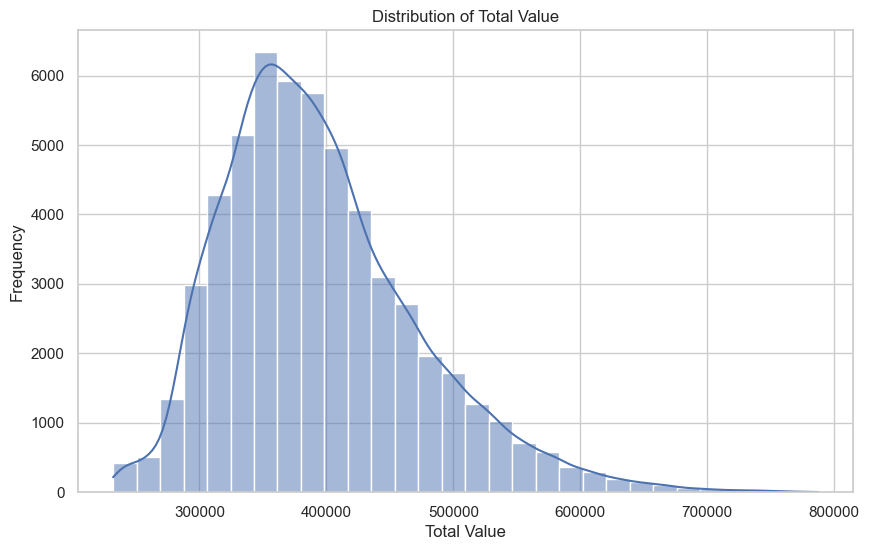

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Value'], bins=30, kde=True)
plt.title('Distribution of Total Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

**The distribution of the Total Value appears to be slightly right-skewed,  This suggests a market with more affordable options and fewer luxury properties.**

**Correlation Between Property Size and Total Value**

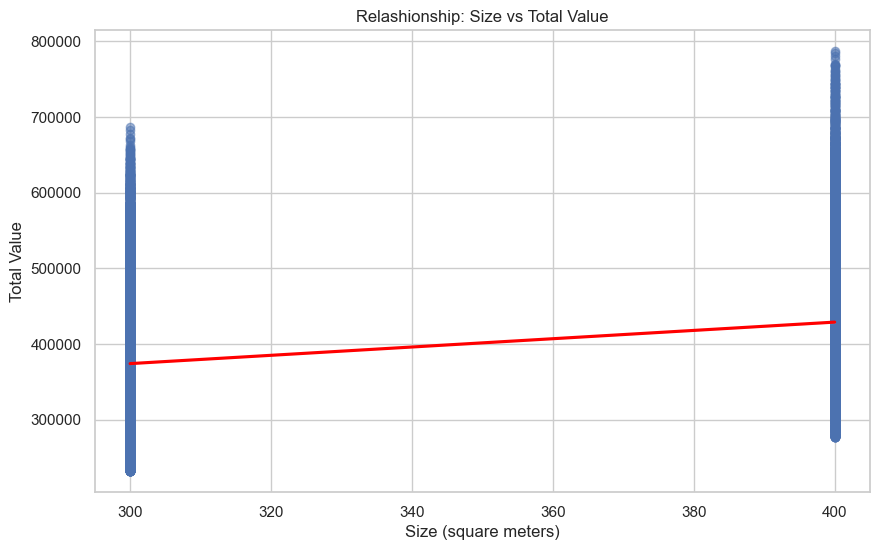

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='Size', y='Total Value', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relashionship: Size vs Total Value')
plt.xlabel('Size (square meters)')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

**The scatter plot shows a positive relationship between Size and Total Value. As the size of the property increases, the total value also tends to increase. The red line indicates the average trend across the dataset.**
**This trend is consistent but shows a  variation in property value at similar sizes, indicating other factors also influence the total value.**

In [42]:
#df.head(1)

**Impact of Street Accessibility on Property Value**

C:\Users\pc\AppData\Local\Temp\ipykernel_11044\3484892509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Number of Streets', y='Total Value', data=df, palette='light:g')


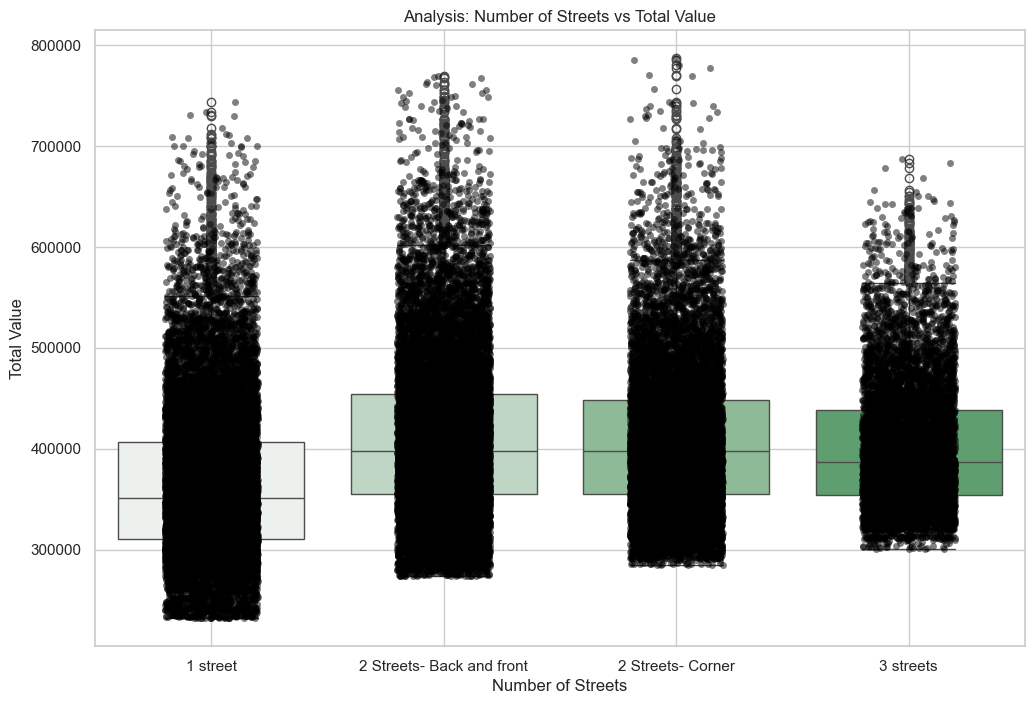

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Number of Streets', y='Total Value', data=df, palette='light:g')
sns.stripplot(x='Number of Streets', y='Total Value', data=df, color='black', jitter=0.2, alpha=0.5)
plt.title('Analysis: Number of Streets vs Total Value')
plt.xlabel('Number of Streets')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()


**Properties facing more streets tend to have higher values. The plot differentiates properties with 1, 2 streets (back and front or corner), and 3 streets. This indicates that increased accessibility or more street frontage enhances property value, likely due to better connectivity and visibility.**

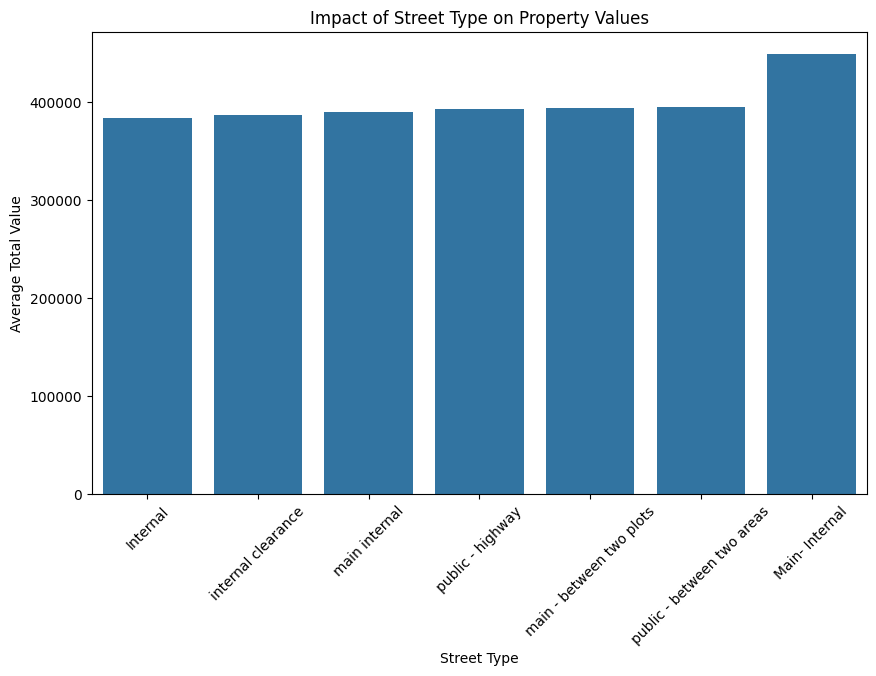

In [43]:

street_impact = df.groupby('Street')['Total Value'].mean().sort_values()
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=street_impact.index, y=street_impact.values)
plt.xticks(rotation=45)
plt.xlabel('Street Type')
plt.ylabel('Average Total Value')
plt.title('Impact of Street Type on Property Values')
plt.show()

**Effect of Basement Presence on Property Values:**

C:\Users\pc\AppData\Local\Temp\ipykernel_11044\3696179760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Basement', y='Total Value', data=df, palette='coolwarm')


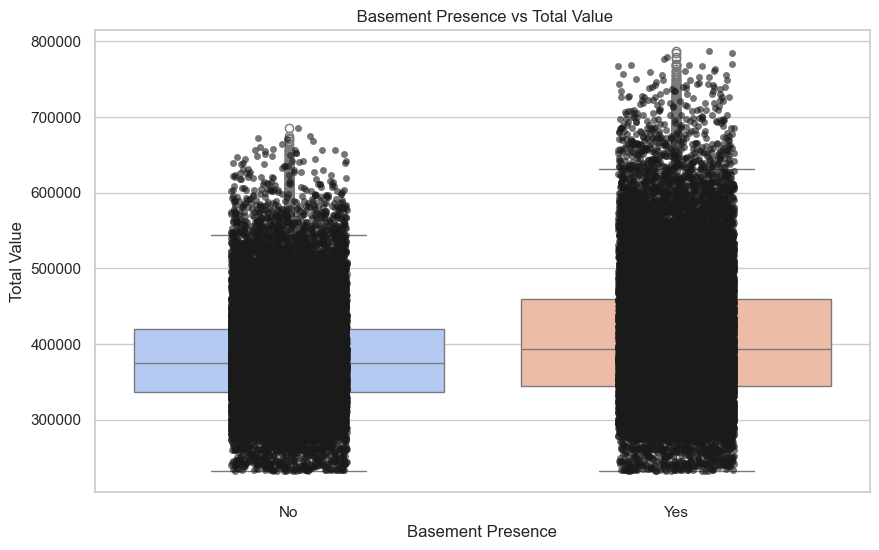

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
sns.boxplot(x='Basement', y='Total Value', data=df, palette='coolwarm')
sns.stripplot(x='Basement', y='Total Value', data=df, color='k', alpha=0.6, jitter=0.15)
plt.title(' Basement Presence vs Total Value')
plt.xlabel('Basement Presence')
plt.ylabel('Total Value')
plt.show()

**Properties with basements tend to have higher total values compared to those without basements.**



**Correlation Analysis Among Top Real Estate Features**

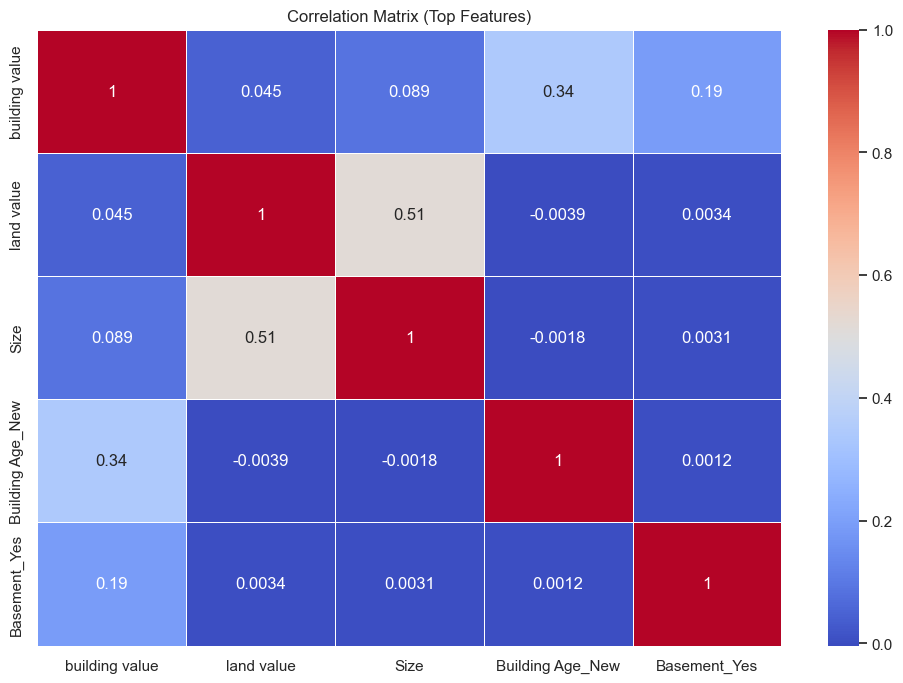

Total Value                                   1.000000
building value                                0.851751
land value                                    0.561396
Size                                          0.343773
Building Age_New                              0.281573
Basement_Yes                                  0.160321
Number of Floors_Ground+first+Second          0.145407
Building Age_6-10                             0.131693
Number of Floors_Ground+First+Half a floor    0.069147
Building Age_11-15                            0.050837
Number of Floors_Ground+First                 0.005155
Building Age_16-20                           -0.045507
Number of Floors_Ground+half a floor         -0.077924
Building Age_21-25                           -0.147841
Building Age_26-30                           -0.237500
Building Age_Demolishing                     -0.271236
Name: Total Value, dtype: float64


In [45]:
selected_columns = [
    'Size', 'Total Value', 'land value', 'building value',
    'Building Age', 'Number of Floors', 'Basement']


df_numeric = pd.get_dummies(df[selected_columns], drop_first=True)# Converting


correlation_matrix = df_numeric.corr()


correlation_with_target = correlation_matrix['Total Value'].sort_values(ascending=False)


top_features = correlation_with_target.index[1:6]  # top 5 features 


top_corr_matrix = df_numeric[top_features].corr()

# heatmapp
plt.figure(figsize=(12, 8))  
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Top Features)')
plt.show()

print(correlation_with_target)


**The most critical factors affecting property value are the building value and land value, followed by the size of the property and the age of the building.**
**The presence of a basement has a minor impact, while the number of floors and certain building age categories also influence the total value, though to a lesser extent.**
**older buildings, especially those nearing demolition, tend to decrease the total property value.**

**Multivariate Analysis of Real Estate Data**

 By examining various factors simultaneously, we can identify which combinations of features are most influential in the market. 

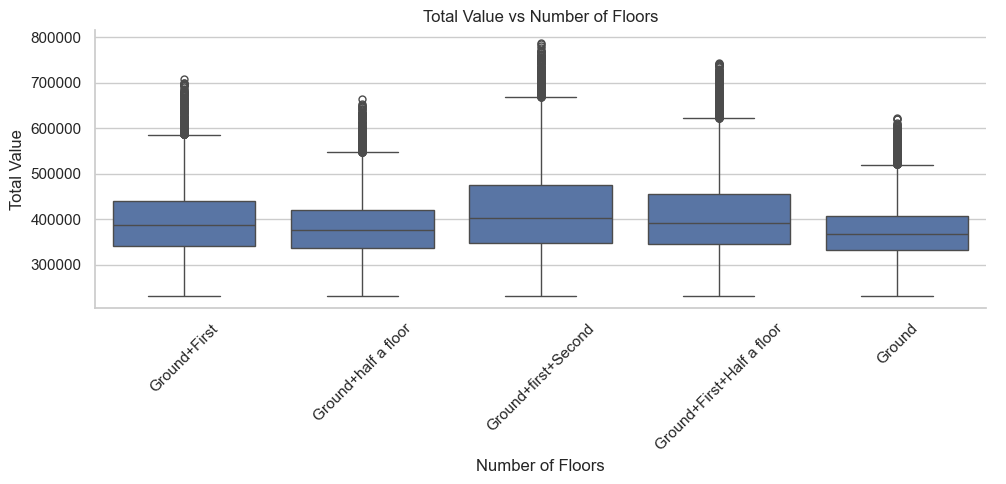

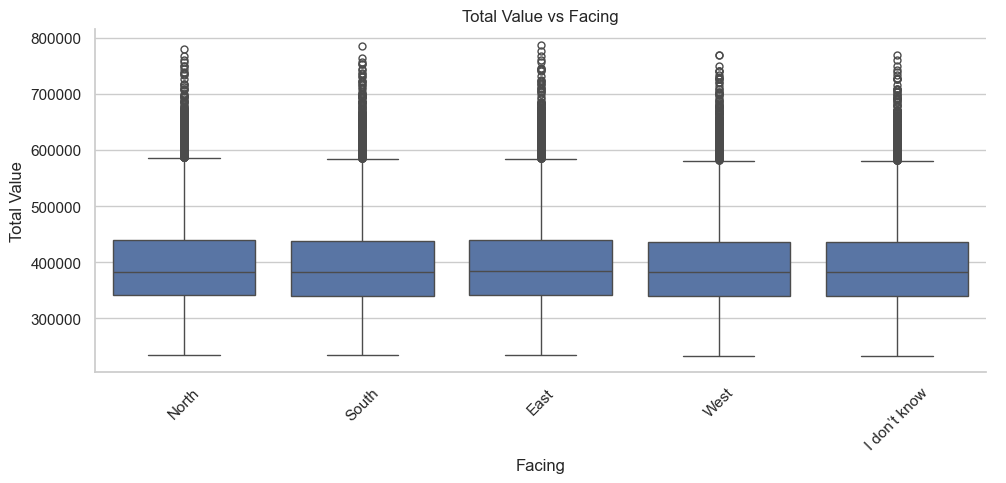

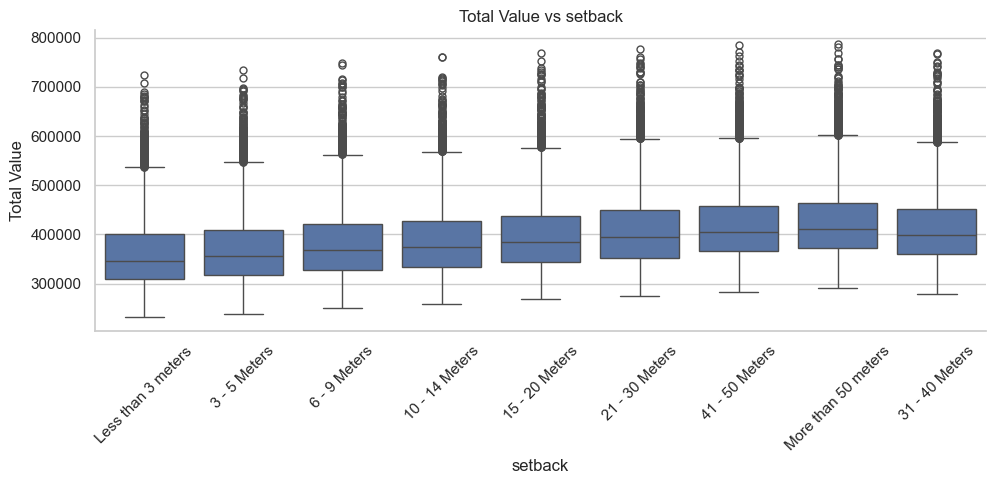

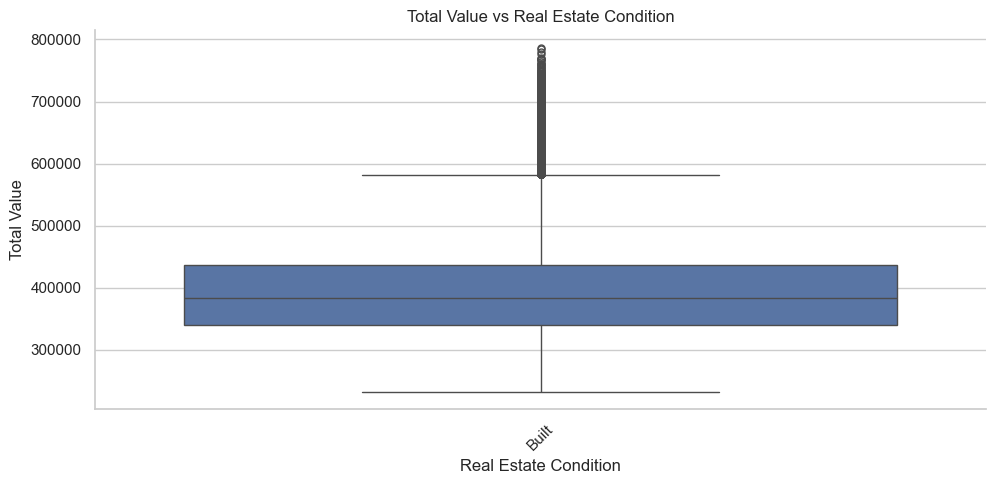

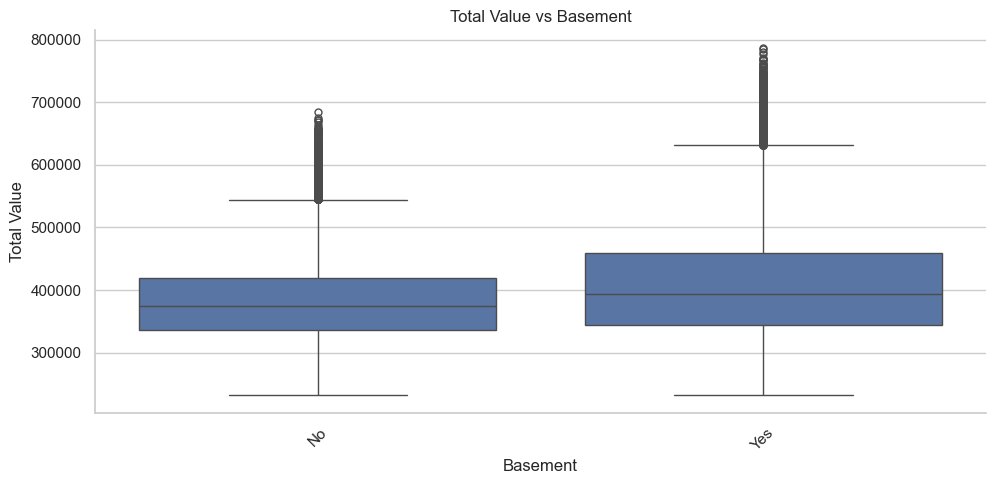

In [47]:
categorical_vars = ['Number of Floors', 'Facing', 'setback', 'Real Estate Condition', 'Basement']

for cat_var in categorical_vars:
    sns.catplot(x=cat_var, y='Total Value', kind='box', data=df, height=5, aspect=2)
    plt.title(f'Total Value vs {cat_var}')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()



**Total Value by Number of Floors**
**Insight:** The box plot clearly shows that as the number of floors increases, the median property value also tends to rise, suggesting that buyers value additional levels.

**Total Value by Facing Direction**

**insight**: The facing direction of properties shows vvery slight  on total values. 


**Effect of Setback on Property Values**
**Insight:**
Larger setbacks, which often result in more front yard space, could be associated with higher property values

**Impact of Real Estate Condition on Property Value**

**Insight**: Property conditions significantly affect total values, Wellmaintained or newly renovated properties fetch higher prices

**Comparison of Property Values With and Without Basements**
**Insight**:Properties with basements generally have higher total values

**Regression Analysis**
The regression analysis provides a quantitative measure of how much each feature, like size or age, affects the total value. Coefficients from this analysis tell us the expected increase in property value for one unit increase in a feature, holding other features constant

**Regression Coefficients Analysis for Property Value Predictors**

In [42]:

# missing values with the median
df['Total Value'] = df['Total Value'].fillna(df['Total Value'].median())
df['land value'] = df['land value'].fillna(df['land value'].median())
df['building value'] = df['building value'].fillna(df['building value'].median())


df_prepared = pd.get_dummies(df, drop_first=True)


X = df_prepared.drop('Total Value', axis=1)
y = df_prepared['Total Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# regression model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Impact Value'])
print("Impact Values:")
print(coefficients)

Root Mean Squared Error: 4969.077479981071
Impact Values:
                                             Impact Value
Size                                             3.626330
land value                                       0.996494
building value                                   0.974199
Number of Streets_2 Streets- Back and front    163.655010
Number of Streets_2 Streets- Corner            209.545107
Number of Streets_3 streets                    310.362105
Street_Main- Internal                        -1730.670304
Street_internal clearance                       70.384834
Street_main - between two plots                 42.931681
Street_main internal                            76.797871
Street_public - between two areas              159.765637
Street_public - highway                        -26.207804
Facing_I don’t know                             13.460641
Facing_North                                   107.663823
Facing_South                                   -18.838462
Facing_West   

**number of floors**

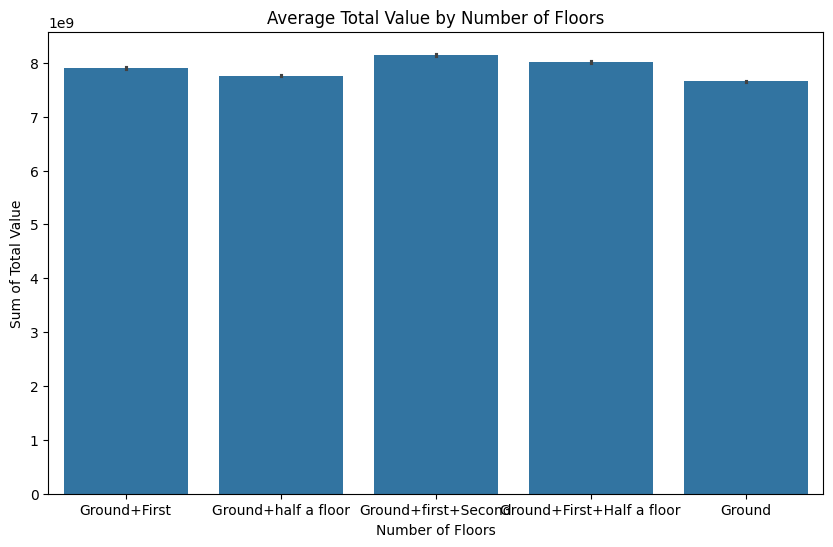

In [17]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Floors', y='Total Value', data=df, estimator=sum)
plt.title('Average Total Value by Number of Floors')
plt.ylabel('Sum of Total Value')
plt.xlabel('Number of Floors')
plt.show()


In [35]:
avg_values = df.groupby('Number of Floors')['Total Value'].mean().reset_index()

# Calculate the overall average to find percentage differences
overall_avg = df['Total Value'].mean()
avg_values['Percentage Difference'] = ((avg_values['Total Value'] - overall_avg) / overall_avg) * 100
avg_values

,Number of Floors,Total Value,Percentage Difference
0,Ground,377449.322466,-3.144646
1,Ground+First,390246.600000,0.139199
2,Ground+First+Half a floor,395616.750000,1.517206
3,Ground+first+Second,402107.950000,3.182879
4,Ground+half a floor,383099.450000,-1.694795


**Basement**

In [21]:

avg_total_value_with_basement = df[df['Basement'] == 'Yes']['Total Value'].mean()
avg_total_value_without_basement = df[df['Basement'] == 'No']['Total Value'].mean()

# percentage diff
percentage_diff = ((avg_total_value_with_basement - avg_total_value_without_basement) / avg_total_value_without_basement) * 100
print(f"The average total value of properties with a basement is {percentage_diff:.2f}% higher than those without.")


The average total value of properties with a basement is 3.58% higher than those without.


**Landvalue**

In [12]:

land_value_coeff = (df['Total Value'] / df['land value']).mean()


building_value_coeff = (df['Total Value'] / df['building value']).mean()

print(f"Average increase in total value per unit of land value: {land_value_coeff:.2f}")
print(f"Average increase in total value per unit of building value: {building_value_coeff:.2f}")


Average increase in total value per unit of land value: 1.17
Average increase in total value per unit of building value: inf


**Setback vs Property values**

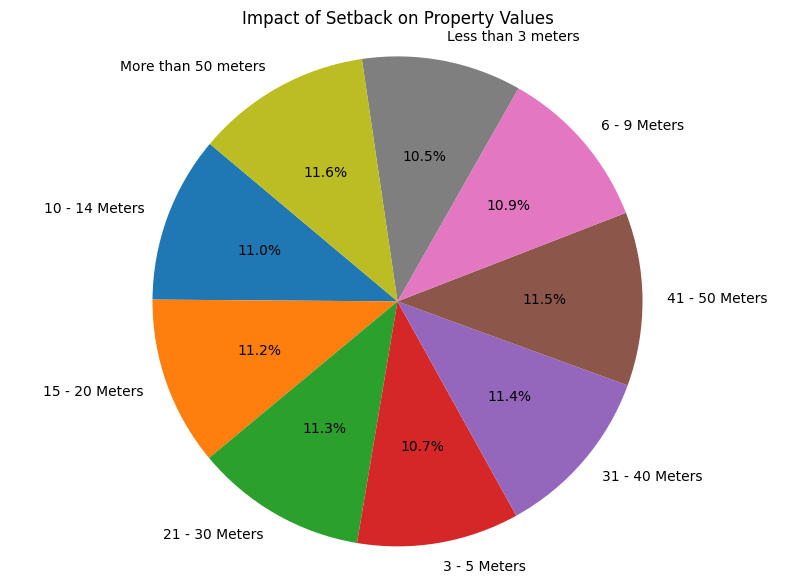

In [14]:
setback_impact = df.groupby('setback')['Total Value'].mean().reset_index()#we will use group by


plt.figure(figsize=(10, 7))
plt.pie(setback_impact['Total Value'], labels=setback_impact['setback'], autopct='%1.1f%%', startangle=140)#making pie chart
plt.title('Impact of Setback on Property Values')
plt.axis('equal')
plt.show()


In [34]:
median_setback_values = df.groupby('setback')['Total Value'].median().reset_index().rename(columns={'Total Value': 'Median Total Value'})
print("Median Total Values by Setback:\n", median_setback_values)

Median Total Values by Setback:
                setback  Median Total Value
0       10 - 14 Meters            383000.0
1       15 - 20 Meters            383000.0
2       21 - 30 Meters            383000.0
3         3 - 5 Meters            383000.0
4       31 - 40 Meters            383000.0
5       41 - 50 Meters            383000.0
6         6 - 9 Meters            383000.0
7   Less than 3 meters            383000.0
8  More than 50 meters            383000.0


**Heat Map for Setback/ Number of floors**

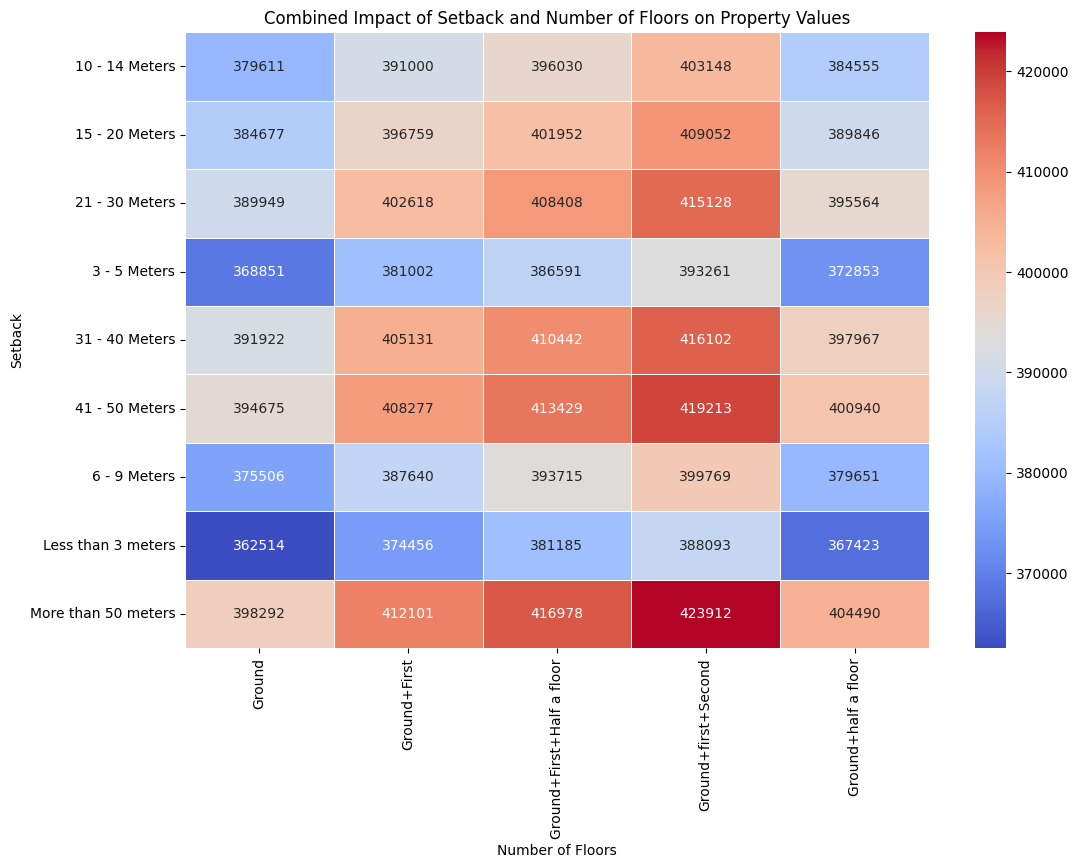

In [13]:
# Creating a pivot table for average values
combined_impact = df.pivot_table(index='setback', columns='Number of Floors', values='Total Value', aggfunc='mean')

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_impact, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Combined Impact of Setback and Number of Floors on Property Values')
plt.ylabel('Setback')
plt.xlabel('Number of Floors')
plt.show()


**size and total value**

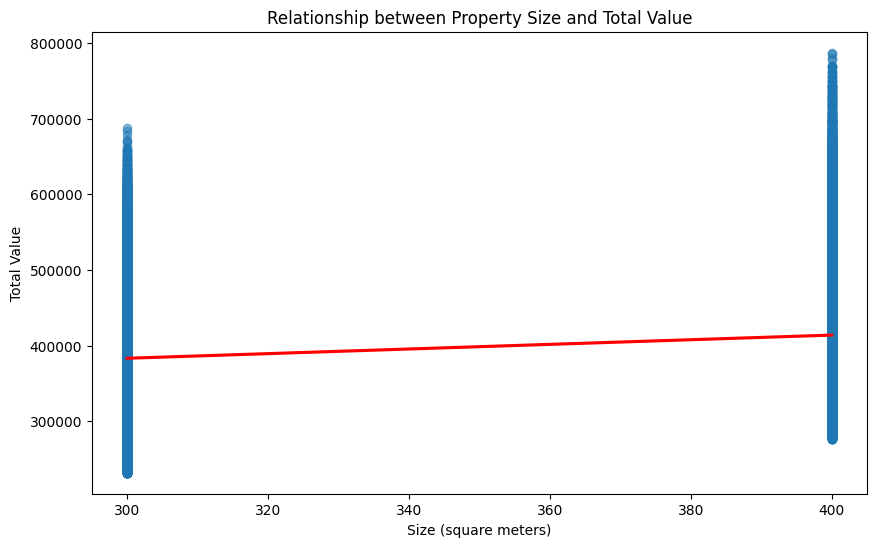

The correlation coefficient between property size and total value is: 0.26
count    99999.000000
mean       338.286383
std         48.608793
min        300.000000
25%        300.000000
50%        300.000000
75%        400.000000
max        400.000000
Name: Size, dtype: float64


In [16]:

plt.figure(figsize=(10, 6))
sns.regplot(x='Size', y='Total Value', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Property Size and Total Value')
plt.xlabel('Size (square meters)')
plt.ylabel('Total Value')
plt.show()

# Calculating correlation
correlation = df['Size'].corr(df['Total Value'])
print(f"The correlation coefficient between property size and total value is: {correlation:.2f}")

# Descriptive statistics for size
print(df['Size'].describe())


**Expensive and cheap house**

In [37]:

most_expensive_house = df.loc[df['Total Value'].idxmax()]


cheapest_house = df.loc[df['Total Value'].idxmin()]


print("Most Expensive House:")
print(most_expensive_house)


print("\nCheapest House:")
print(cheapest_house)


Most Expensive House:
Size                                      400
Number of Streets           2 Streets- Corner
Street                     internal clearance
Facing                                   East
setback                   More than 50 meters
Real Estate Condition                   Built
Building Age                              New
Number of Floors          Ground+first+Second
Basement                                  Yes
Total Value                          787000.0
land value                           420000.0
building value                       367000.0
Name: 96628, dtype: object

Cheapest House:
Size                                     300
Number of Streets                   1 street
Street                              Internal
Facing                                  West
setback                   Less than 3 meters
Real Estate Condition                  Built
Building Age                             New
Number of Floors                      Ground
Basement              

### Project Overview

Project report is attached in the Docx file...